In [2]:
from astropy.table import Table, Column
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import pairplot, kdeplot
# Assuming you have located the table fits file in the same directory 
tab = Table.read('../data/DR16Q_v4.fits')

# loading required features 

#  SDSS fluxes 
psfmag = np.array(tab['PSFMAG'])
u = psfmag[:,0]
g = psfmag[:,1]
r = psfmag[:,2]
i = psfmag[:,3]
z = psfmag[:,4]

#  SDSS mag SN
psfmag_error = tab['PSFMAGERR']
psfmag_SN = psfmag/psfmag_error
# SDSS mag Signal to Noise -> Flux*(1/Flux_variance)
u_SN = psfmag_SN[:,0]
g_SN = psfmag_SN[:,1]
r_SN = psfmag_SN[:,2]
i_SN = psfmag_SN[:,3]
z_SN = psfmag_SN[:,4]

# WISE magnitudes
W1 = tab['W1_MAG']
W2 = tab['W2_MAG']

# Wise MAG SN 
W1_error = tab['W1_MAG_ERR']
W2_error = tab['W2_MAG_ERR']
# WISE MAG SN
W1_SN = W1/W1_error
W2_SN = W2/W2_error

#  Other features 
redshift = tab['Z']
zwarning = tab['ZWARNING']

# creating mask for filtering out noisy data
e=3
mask = (u_SN>e) & (g_SN>e) & (r_SN>e) & (i_SN>e) & (z_SN>e) & (zwarning==0)  & (W1_SN>e) & (W2_SN>e) &  (redshift<=2.7) & (redshift>=2)

# Filtering DR16Q
tab.remove_rows(mask==0)
tab.write('reduced_dr16q.fits')
# Definiging colors -> difference between magnitude in two filters
r = r[mask]
i = i[mask]
z = z[mask]
W1 = W1[mask]
W2 = W2[mask]
# colors
rz = r-z
rW1 = r-W1
iW1 = i-W1
zW1 = z-W1
rW2 = r-W2
iW2 = i-W2
zW2 = z-W2

data = np.array(list(zip(rz, rW1, iW1, zW1, rW2, iW2, zW2)))
data_scaled = StandardScaler().fit_transform(data)
df = pd.DataFrame(data=data, columns=['rz_0', 'rW1_0', 'iW1_0', 'zW1_0', 'rW2_0', 'iW2_0', 'zW2_0'])
df_scaled = pd.DataFrame(data=data_scaled, columns=['rz_sc', 'rW1_sc', 'iW1_sc', 'zW1_sc', 'rW2_sc', 'iW2_sc', 'zW2_sc'])
print('Raw Sample Size: %d'%len(redshift))
print('Reduced Sample Size with measurement/error>3: %d'%(sum(mask)))
df_scaled.to_csv('data_scaled.csv', index=False)
df.to_csv('data_0.csv', index=False)

/home/reza/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


Raw Sample Size: 750414
Reduced Sample Size with measurement/error>3: 177985


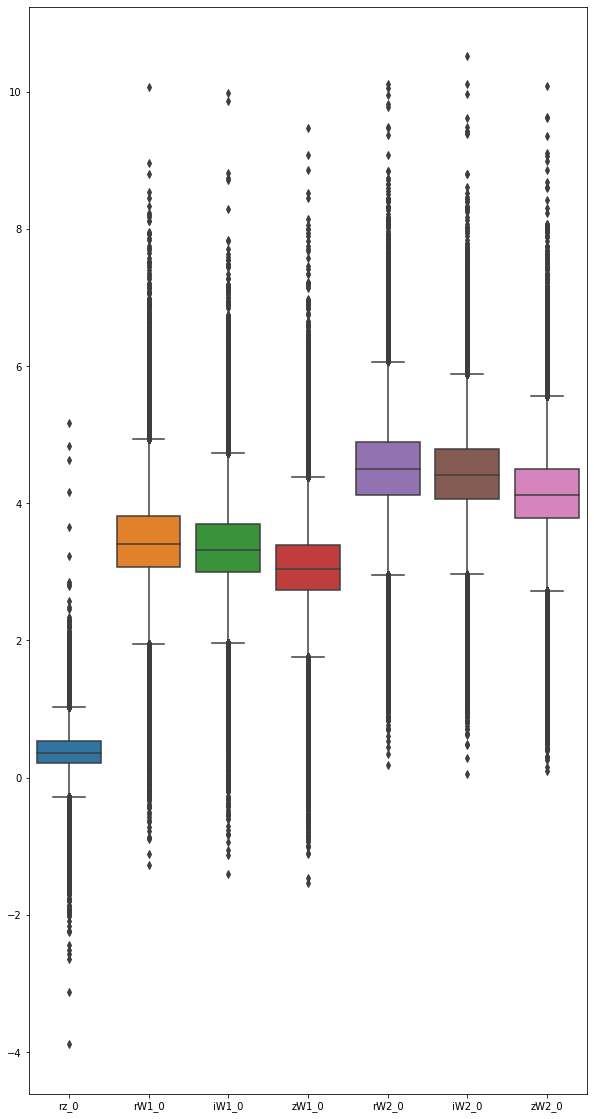

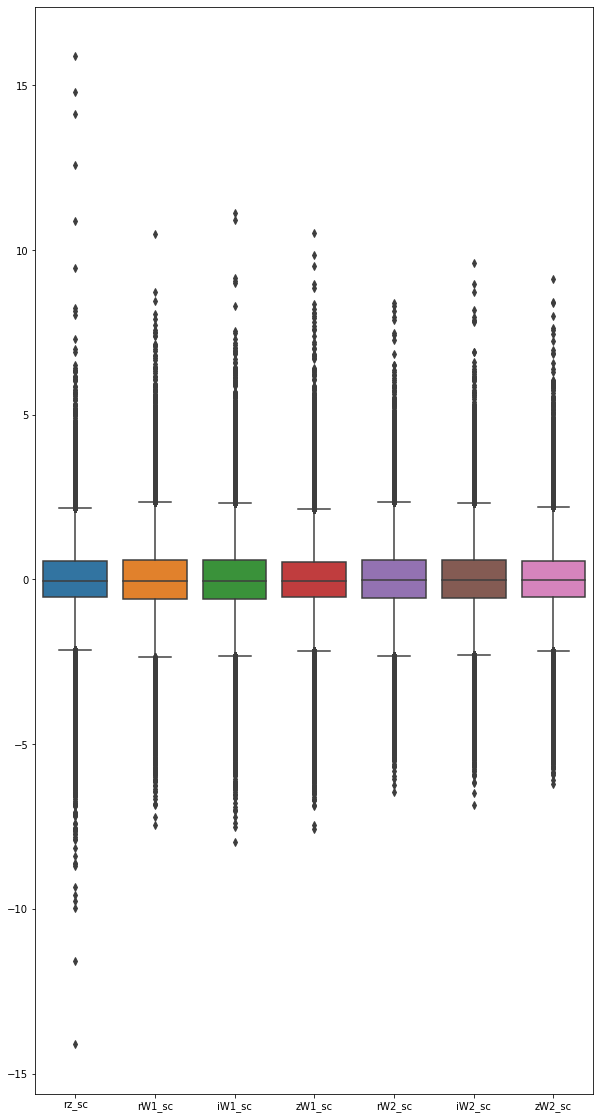

In [6]:
# Getting to know the data by Box plot of raw data and scaled data
import seaborn as sn
import matplotlib.pyplot as plt
# Outliners detection and class imbalance

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=df, orient="v",ax=axes)
plt.savefig('box_plot.png', dpi=800)
plt.show()

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=df_scaled, orient="v",ax=axes)
plt.savefig('box_plot_scaled.png', dpi=800)
plt.show()

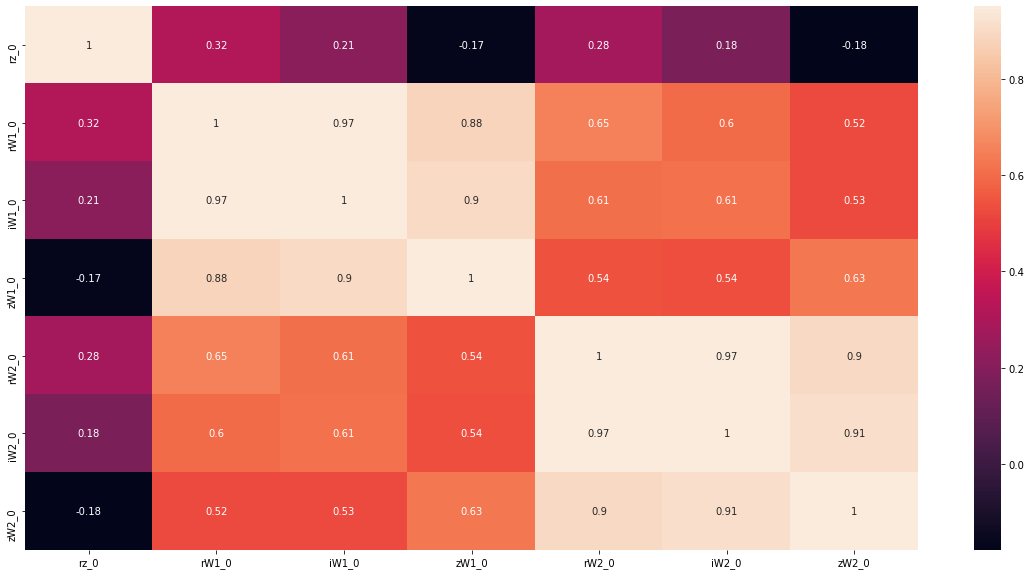

In [7]:
# Correlation analysis
corrMatt = df.corr()
mask = np.array(corrMatt)
# mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, vmax=.95, annot=True)
plt.savefig('cor-matrix.png', dpi=800)
plt.show()

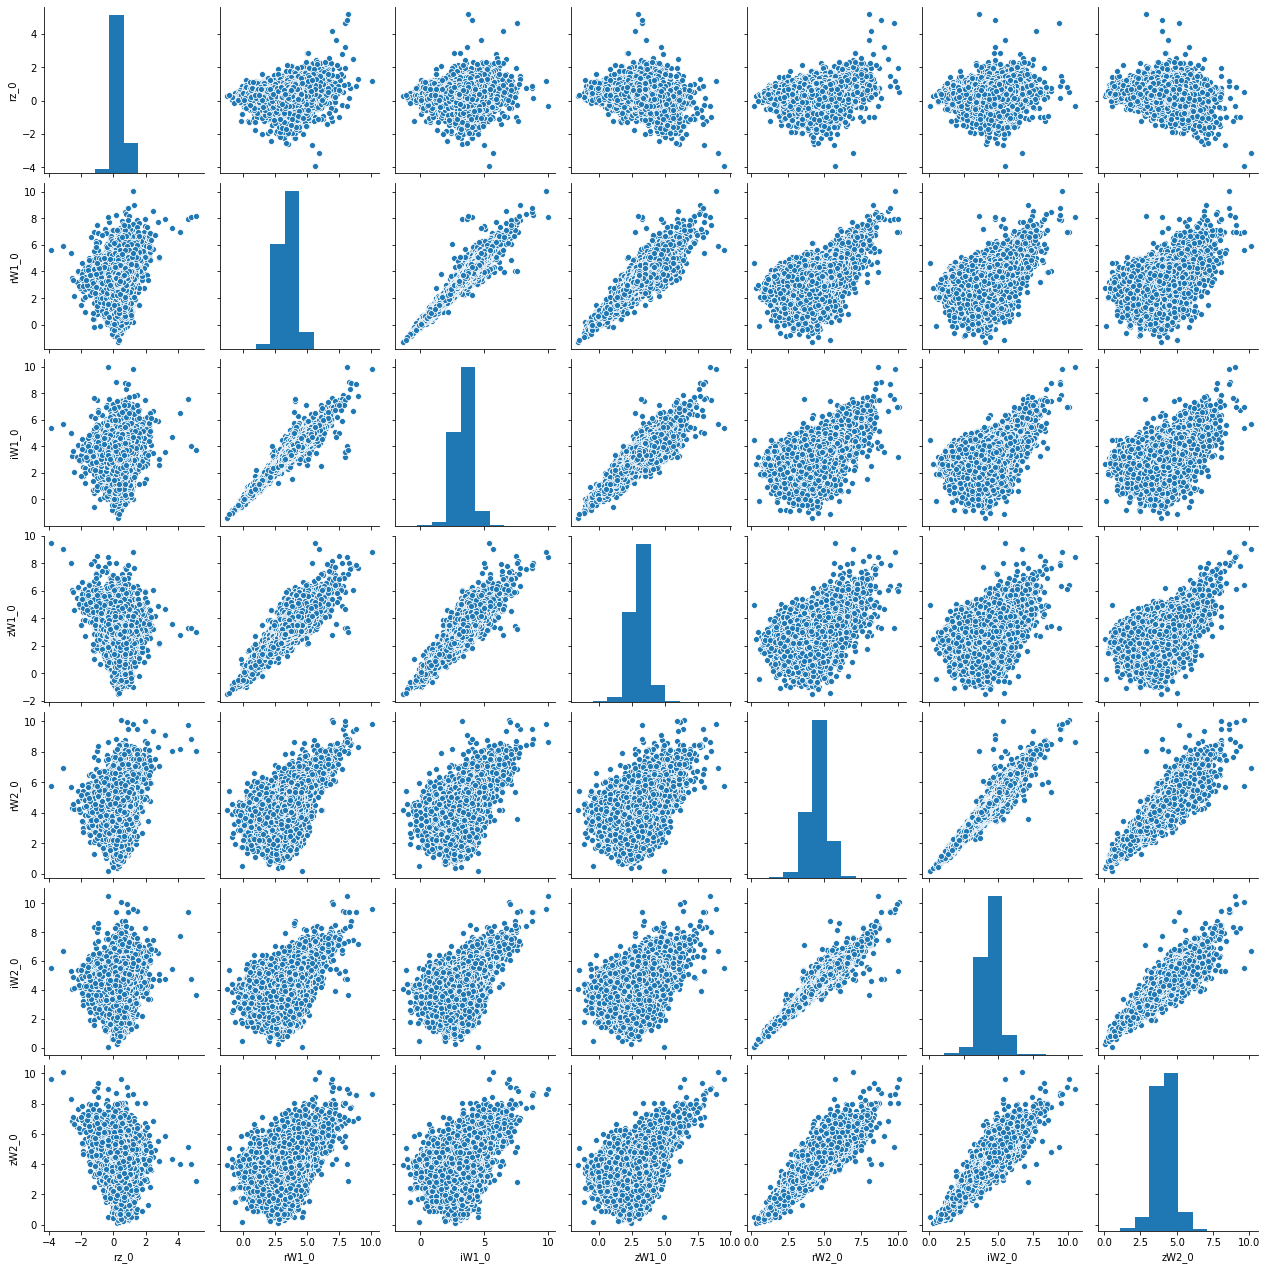

In [8]:
sns_plot = pairplot(df)
plt.savefig('pair_plot.png')